In [281]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [282]:
df = pd.read_excel(r'Raw_data.xlsx')

In [283]:
clustering_cols = ['user_id','chipin_account_type', 'chipin_subscription_amount',
                   'has_facebook_account','has_instagram_account','has_snapchat_account',
                   'has_bio','has_twitter','allow_collaboration','allow_direct_messaging',
                   'allow_comments','chipin_plus_lock_all_songs','verified','profile_likes',
                   'profile_comments','profile_views','song_name','song_duration','song_likes','song_comments',
                   'no_plays','no_retracks','downloads_count','song_views']

df1 = df[clustering_cols]

In [284]:
numeric_cols = df1.select_dtypes(include=['float', 'int']).columns
print(numeric_cols)

Index(['user_id', 'chipin_subscription_amount', 'has_facebook_account',
       'has_instagram_account', 'has_snapchat_account', 'has_bio',
       'has_twitter', 'profile_likes', 'profile_comments', 'profile_views',
       'song_duration', 'song_likes', 'song_comments', 'no_plays',
       'no_retracks', 'downloads_count', 'song_views'],
      dtype='object')


In [285]:
#fill missing values with 0
df1[numeric_cols] = df1[numeric_cols].fillna(0)

#create dummies of chipin_account_type
chipin_account_type_dummies = pd.get_dummies(df1['chipin_account_type'])
df1 = pd.concat([df1,chipin_account_type_dummies],axis=1)

df1 = df1.drop(columns=["chipin_account_type"])

In [286]:
df1.isnull().sum()

user_id                       0
chipin_subscription_amount    0
has_facebook_account          0
has_instagram_account         0
has_snapchat_account          0
has_bio                       0
has_twitter                   0
allow_collaboration           0
allow_direct_messaging        0
allow_comments                0
chipin_plus_lock_all_songs    0
verified                      0
profile_likes                 0
profile_comments              0
profile_views                 0
song_name                     0
song_duration                 0
song_likes                    0
song_comments                 0
no_plays                      0
no_retracks                   0
downloads_count               0
song_views                    0
chipin                        0
chipin_plus                   0
not_enabled                   0
dtype: int64

In [287]:
#creating dataset at artist level
df_user_song_count = df1.groupby(['user_id'])['song_name'].count()

df_user_song_details = df1.groupby(['user_id'])["song_duration", "song_likes",'song_comments',
                       'no_plays','downloads_count','song_views'].apply(lambda x : x.astype(float).sum())

In [288]:
df_user_song = pd.concat([df_user_song_count, df_user_song_details], axis=1)

In [289]:
#calculating metrics corresponding to songs produced by artist
df_user_song['average_song_duration'] = df_user_song['song_duration']/df_user_song['song_name']
df_user_song['average_song_likes'] = df_user_song['song_likes']/df_user_song['song_name']
df_user_song['average_song_comments'] = df_user_song['song_comments']/df_user_song['song_name']
df_user_song['average_song_plays'] = df_user_song['no_plays']/df_user_song['song_name']
df_user_song['average_song_downlaods'] = df_user_song['downloads_count']/df_user_song['song_name']
df_user_song['average_song_views'] = df_user_song['song_views']/df_user_song['song_name']
df_user_song

,song_name,song_duration,song_likes,song_comments,no_plays,downloads_count,song_views,average_song_duration,average_song_likes,average_song_comments,average_song_plays,average_song_downlaods,average_song_views
user_id,,,,,,,,,,,,,
2,3,1368.0,0.0,0.0,226.0,0.0,1.0,456.0,0.0,0.0,75.333333,0.0,0.333333
4,2,320.0,0.0,0.0,282.0,0.0,0.0,160.0,0.0,0.0,141.000000,0.0,0.000000
5,2,156.0,0.0,0.0,328.0,0.0,1.0,78.0,0.0,0.0,164.000000,0.0,0.500000
6,2,372.0,1.0,0.0,76.0,0.0,6.0,186.0,0.5,0.0,38.000000,0.0,3.000000
7,1,80.0,1.0,0.0,13.0,0.0,0.0,80.0,1.0,0.0,13.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18713,1,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.000000,0.0,0.000000
18722,1,46.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.000000,0.0,0.000000
18724,1,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.000000


In [290]:
df_user_song = df_user_song.drop(columns=["song_duration", "song_likes",'song_comments',
                       'no_plays','downloads_count','song_views'])

In [291]:
df_user_song = df_user_song.rename(columns={"song_name": "total_songs"})

In [262]:
df_user_song

,total_songs,average_song_duration,average_song_likes,average_song_comments,average_song_plays,average_song_downlaods,average_song_views
user_id,,,,,,,
2,3,456.0,0.0,0.0,75.333333,0.0,0.333333
4,2,160.0,0.0,0.0,141.000000,0.0,0.000000
5,2,78.0,0.0,0.0,164.000000,0.0,0.500000
6,2,186.0,0.5,0.0,38.000000,0.0,3.000000
7,1,80.0,1.0,0.0,13.000000,0.0,0.000000
...,...,...,...,...,...,...,...
18713,1,8.0,0.0,0.0,0.000000,0.0,0.000000
18722,1,46.0,0.0,0.0,0.000000,0.0,0.000000
18724,1,2.0,0.0,0.0,0.000000,0.0,0.000000


In [263]:
df_artist_base = df1.groupby(['user_id'])['has_facebook_account',
                         'has_instagram_account',
                         'has_bio','has_twitter','profile_likes',
                         'profile_comments','profile_views'].apply(lambda x : x.max())

In [264]:
df_artist_song_detail = pd.concat([df_artist_base, df_user_song], axis=1)

In [265]:
df_artist_song_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7784 entries, 2 to 18728
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   has_facebook_account    7784 non-null   float64
 1   has_instagram_account   7784 non-null   float64
 2   has_bio                 7784 non-null   float64
 3   has_twitter             7784 non-null   float64
 4   profile_likes           7784 non-null   float64
 5   profile_comments        7784 non-null   float64
 6   profile_views           7784 non-null   float64
 7   total_songs             7784 non-null   int64  
 8   average_song_duration   7784 non-null   float64
 9   average_song_likes      7784 non-null   float64
 10  average_song_comments   7784 non-null   float64
 11  average_song_plays      7784 non-null   float64
 12  average_song_downlaods  7784 non-null   float64
 13  average_song_views      7784 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 

In [266]:
#removing outlier before clustering
df_artist_song_detail = df_artist_song_detail.drop([6663])

In [267]:
#scaling every variable for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_artist_song_detail)

scaled_data = scaler.transform(df_artist_song_detail)

scaled_data


array([[-0.15122056, -0.16854997, -0.35932784, ...,  2.58755992,
        -0.07727351,  0.06226619],
       [-0.15122056, -0.16854997, -0.35932784, ...,  4.97605513,
        -0.07727351, -0.12190345],
       [-0.15122056, -0.16854997,  2.78297392, ...,  5.81263467,
        -0.07727351,  0.15435101],
       ...,
       [-0.15122056, -0.16854997, -0.35932784, ..., -0.15254118,
        -0.07727351, -0.12190345],
       [-0.15122056, -0.16854997, -0.35932784, ..., -0.15254118,
        -0.07727351, -0.12190345],
       [-0.15122056, -0.16854997, -0.35932784, ..., -0.15254118,
        -0.07727351, -0.12190345]])

In [268]:
def find_best_clusters(data, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(data)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers , k_values


In [269]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

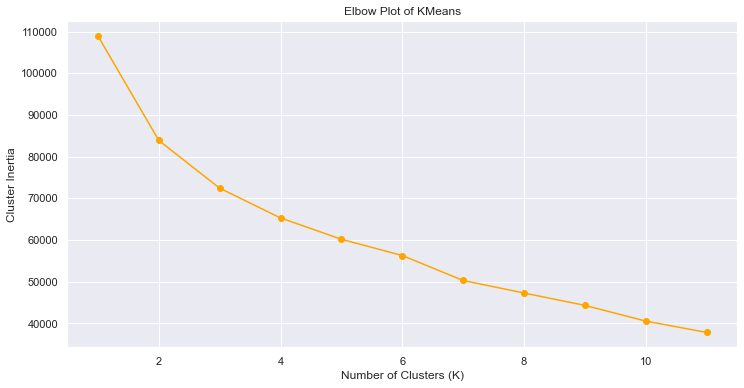

In [270]:
clusters_centers,k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [271]:
#clustering on best number of clusters
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [272]:
df_artist_song_detail["clusters"] = kmeans_model.labels_

df_artist_song_detail.head()

,has_facebook_account,has_instagram_account,has_bio,has_twitter,profile_likes,profile_comments,profile_views,total_songs,average_song_duration,average_song_likes,average_song_comments,average_song_plays,average_song_downlaods,average_song_views,clusters
user_id,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3,456.0,0.0,0.0,75.333333,0.0,0.333333,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,160.0,0.0,0.0,141.000000,0.0,0.000000,0
5,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2,78.0,0.0,0.0,164.000000,0.0,0.500000,2
6,0.0,0.0,1.0,0.0,1.0,1.0,40.0,2,186.0,0.5,0.0,38.000000,0.0,3.000000,2
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,80.0,1.0,0.0,13.000000,0.0,0.000000,0


/Users/jyotidevenda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jyotidevenda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotidevenda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 99.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jyotidevenda/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.5% of the points cannot be placed; you may want to decrease th

<AxesSubplot:xlabel='clusters', ylabel='profile_likes'>

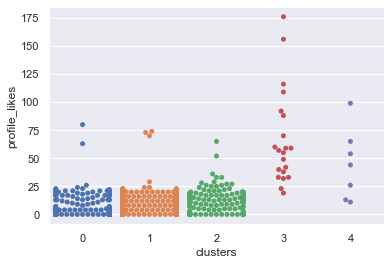

In [192]:
#visualizing clusters for profile likes
sns.swarmplot(df_artist_song_detail.clusters,df_artist_song_detail.profile_likes)

In [273]:
#segment profiling
df_artist_song_detail['user_id'] = df_artist_song_detail.index

In [274]:
cluster_number_of_users = df_artist_song_detail.groupby(['clusters'])["user_id"].count()

In [275]:
cluster_engagement_rates = df_artist_song_detail.groupby(['clusters'])["profile_likes","profile_comments","profile_views","total_songs",
                                            "average_song_duration", "average_song_likes",'average_song_comments',
                       'average_song_plays','average_song_downlaods','average_song_views'].apply(lambda x : x.astype(float).mean()).round(2)

In [243]:
cluster_sm = df_artist_song_detail.groupby(['clusters'])["has_facebook_account","has_instagram_account",
                                                                       "has_twitter","has_bio"].apply(lambda x : x.astype(float).sum()).round(2)

In [244]:
cluster_collated_profile = pd.concat([cluster_number_of_users, cluster_engagement_rates, cluster_sm], axis=1)

In [245]:
cluster_collated_profile = cluster_collated_profile.rename(columns={"user_id": "artists"})

In [246]:
cluster_collated_profile["%facebook"] = (cluster_collated_profile["has_facebook_account"]/cluster_collated_profile["artists"]).round(2)
cluster_collated_profile["%insta"] = (cluster_collated_profile["has_instagram_account"]/cluster_collated_profile["artists"]).round(2)
cluster_collated_profile["%twitter"] = (cluster_collated_profile["has_twitter"]/cluster_collated_profile["artists"]).round(2)
cluster_collated_profile["%bio"] = (cluster_collated_profile["has_bio"]/cluster_collated_profile["artists"]).round(2)

In [247]:
cluster_collated_profile

,artists,profile_likes,profile_comments,profile_views,total_songs,average_song_duration,average_song_likes,average_song_comments,average_song_plays,average_song_downlaods,average_song_views,has_facebook_account,has_instagram_account,has_twitter,has_bio,%facebook,%insta,%twitter,%bio
clusters,,,,,,,,,,,,,,,,,,,
0,6824,2.08,0.01,0.72,1.93,5273.03,0.04,0.00,2.04,0.16,0.09,12.0,14.0,1.0,0.0,0.00,0.00,0.00,0.00
1,168,10.82,0.63,63.99,7.87,23008.19,1.08,0.12,9.31,0.20,2.60,138.0,162.0,108.0,119.0,0.82,0.96,0.64,0.71
2,7,44.57,1.43,656.43,4.57,90771.94,10.55,2.41,147.81,4.47,40.75,2.0,5.0,2.0,7.0,0.29,0.71,0.29,1.00
3,21,66.95,5.48,1234.67,32.95,36037.22,3.66,0.33,82.26,3.56,9.28,13.0,20.0,15.0,19.0,0.62,0.95,0.71,0.90
4,763,1.88,0.05,9.68,6.70,3916.33,0.13,0.01,18.85,2.38,0.26,9.0,14.0,5.0,745.0,0.01,0.02,0.01,0.98
